In [1]:
import os
import sys

In [2]:
sys.prefix

'/Users/mingzhang/anaconda3'

In [3]:
import pandas as pd

/Users/mingzhang/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
housing=pd.read_csv('/Users/mingzhang/Downloads/housing.csv')

In [5]:
list(housing)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [6]:
housing['ocean_proximity'].value_counts()/housing['ocean_proximity'].count()

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

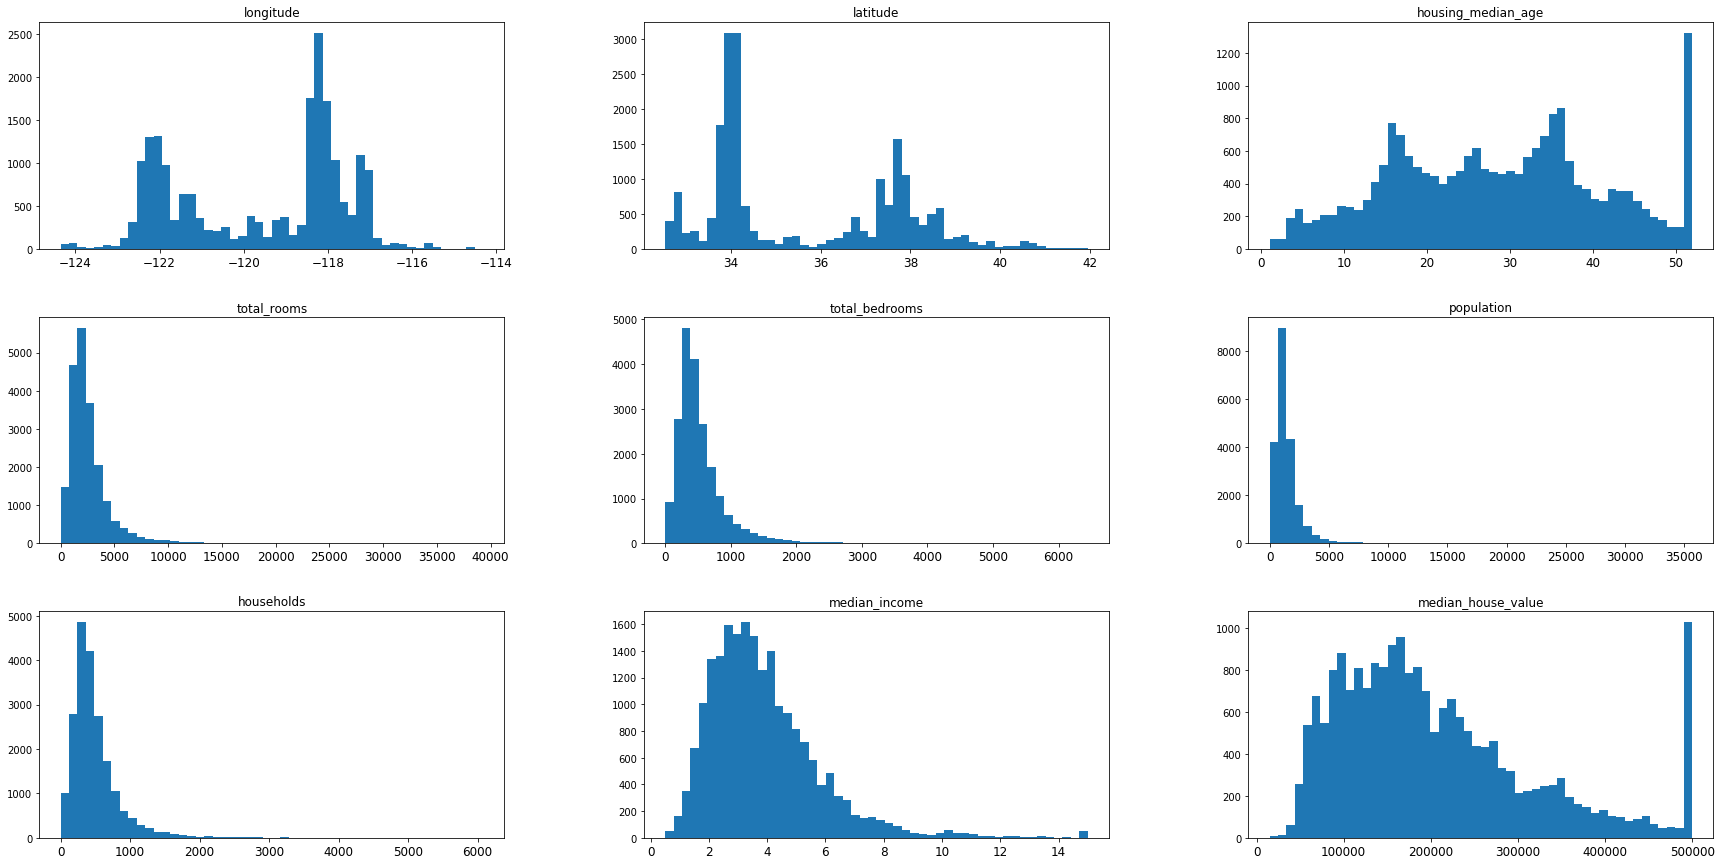

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=housing.hist(bins=50, figsize=(30,15), grid=False,xlabelsize=12)
[x.title.set_size(12) for x in fig.ravel()]
plt.show()

In [8]:
import numpy as np

In [9]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [10]:
train_set, test_set = split_train_test(housing, 0.2)

In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from zlib import crc32

In [15]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [16]:
def split_train_test_by_id(data, test_ratio, id_column):
        ids = data[id_column]
        in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio)) 
        return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
housing_with_id = housing.reset_index() # adds an `index` column 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [18]:
len(train_set)

16512

In [19]:
len(test_set)

4128

In [20]:
import numpy as np

In [21]:
def split_train_test(data, test_ratio):
        shuffled_indices = np.random.permutation(len(data))
        test_set_size = int(len(data) * test_ratio) 
        test_indices = shuffled_indices[:test_set_size] 
        train_indices = shuffled_indices[test_set_size:]
        return data.iloc[train_indices], data.iloc[test_indices]


In [22]:
train_set, test_set = split_train_test(housing, 0.2)

In [23]:
# housing["income_cat"] = pd.cut(housing["median_income"],
#                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf]\
#                                , labels=[1.0, 2.0, 3.0, 4.0, 5.0])


In [24]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5,5.0,inplace=True)

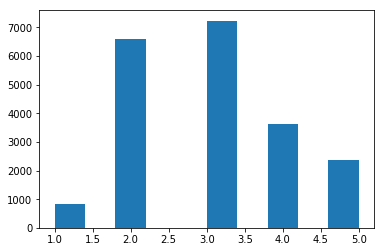

In [25]:
housing["income_cat"].hist(grid=False)

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

In [27]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
        strat_train_set=housing.loc[train_index]
        strat_test_set=housing.loc[test_index]

In [28]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [29]:
len(strat_train_set)

16512

In [30]:
len(strat_test_set)

4128

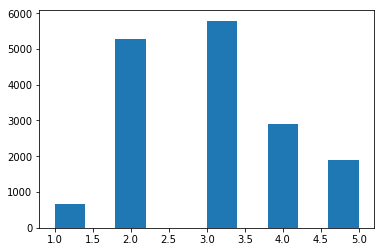

In [31]:
strat_train_set['income_cat'].hist(grid=False)

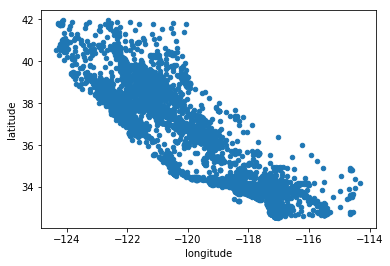

In [32]:
housing.plot(kind='scatter', x='longitude', y='latitude')

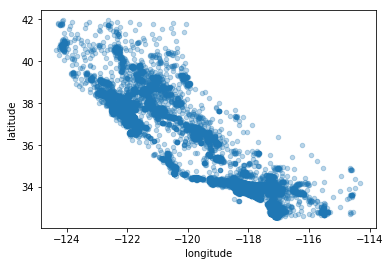

In [33]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3)

In [34]:
 corr_matrix=housing.corr()

In [35]:
corr_matrix['median_income'].sort_values(ascending=False)

median_income         1.000000
income_cat            0.902750
median_house_value    0.688075
total_rooms           0.198050
households            0.013033
population            0.004834
total_bedrooms       -0.007723
longitude            -0.015176
latitude             -0.079809
housing_median_age   -0.119034
Name: median_income, dtype: float64

In [36]:
from pandas.plotting import scatter_matrix

In [37]:
attr=["median_house_value", "median_income", "total_rooms",\
                  "housing_median_age"]

In [38]:
#scatter_matrix(housing[attr], figsize=(20, 12))

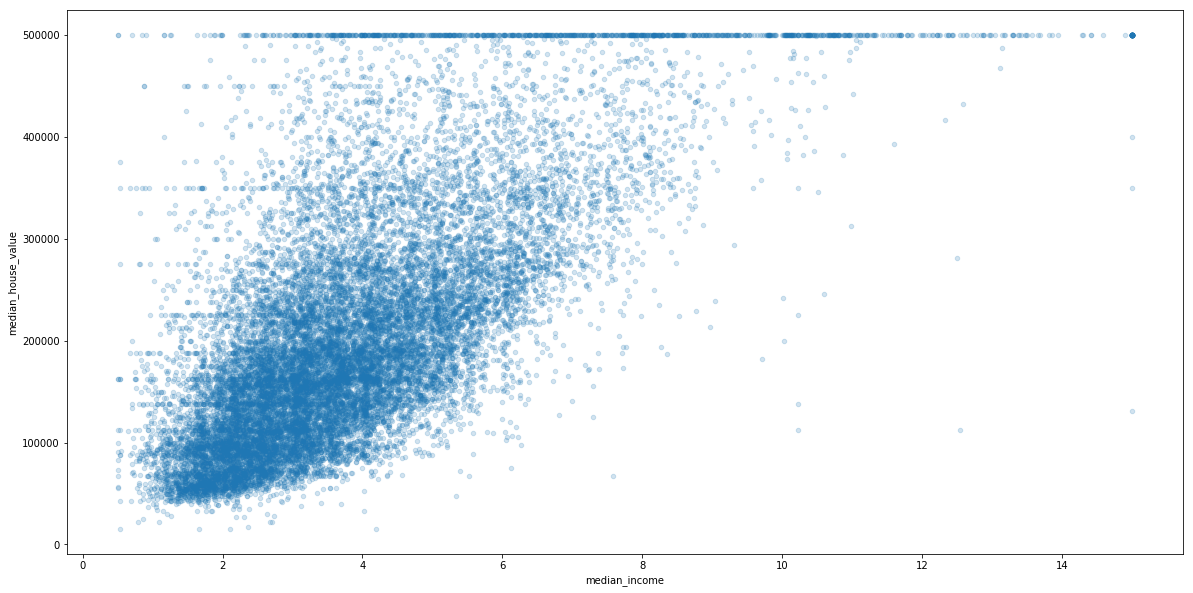

In [39]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca()

housing.plot(kind='scatter',x="median_income", y='median_house_value', alpha=0.2, ax=ax)

In [40]:
housing=strat_train_set.drop("median_house_value", axis=1)

In [41]:
housing_labels=strat_train_set['median_house_value'].copy()

In [42]:
type(housing_labels)

pandas.core.series.Series

In [43]:
median=housing['total_bedrooms'].median()

In [44]:
housing['total_bedrooms'].fillna(median, inplace=True)

In [45]:
housing['total_bedrooms'].describe()

count    16512.000000
mean       533.939438
std        410.806260
min          2.000000
25%        296.000000
50%        433.000000
75%        641.000000
max       6210.000000
Name: total_bedrooms, dtype: float64

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
imputer=SimpleImputer(strategy='median')

In [48]:
housing_num=housing.drop('ocean_proximity', axis=1)

In [49]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [50]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [51]:
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884,3.006783
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931,1.054600
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950,2.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,5.000000


In [52]:
x=imputer.transform(housing_num)

In [53]:
type(x)

numpy.ndarray

In [54]:
housing_tr=pd.DataFrame(x, columns=housing_num.columns)

In [55]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884,3.006783
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931,1.054600
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950,2.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,5.000000


In [56]:
housing['total_bedrooms'].isnull().values.any()

False

In [57]:
strat_train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,3.006783
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,1.054600
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,2.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,5.000000


In [58]:
# list(strat_train_set)
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3.0


In [59]:
housing=strat_train_set.drop("median_house_value", axis=1)

In [60]:
housing_labels=strat_train_set["median_house_value"].copy()

In [61]:
housing.describe(percentiles = [ .20, .40, .60, .80], include = ['object', 'float', 'int'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512,16512.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7277,NaN
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,NaN,3.006783
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,NaN,1.054600
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,NaN,1.000000
20%,-121.980000,33.870000,17.000000,1293.200000,268.600000,706.000000,253.000000,2.358300,NaN,2.000000
40%,-119.956000,34.100000,25.000000,1829.000000,375.000000,1005.000000,354.000000,3.141280,NaN,3.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,NaN,3.000000


In [62]:
#CHECK WHICH COLUMNS CONTAIN NA
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
dtype: int64

In [63]:
#backfill na 
#simple way
#option 1

median=housing["total_bedrooms"].median()

In [64]:
housing["total_bedrooms"].fillna(median, inplace=True)

In [65]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
income_cat            0
dtype: int64

In [66]:
#option 2
#imputering from sklearn
from sklearn.impute import SimpleImputer

In [67]:
imputer=SimpleImputer(strategy='median')

In [68]:
type(imputer)

sklearn.impute._base.SimpleImputer

In [69]:
# Since the median can only be computed on numerical attributes, 
# we need to create a copy of the data without the text attribute ocean_proximity
housing_num=housing.drop('ocean_proximity', axis=1)

In [70]:
housing_num.describe(percentiles=[.1, .2, .5, .7, .8], include = ['object', 'float', 'int'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884,3.006783
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931,1.054600
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,1.000000
10%,-122.280000,33.630000,12.000000,935.100000,199.000000,508.000000,183.000000,1.904540,2.000000
20%,-121.980000,33.870000,17.000000,1293.200000,269.000000,706.000000,253.000000,2.358300,2.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,3.000000
70%,-118.130000,37.490000,36.000000,2873.000000,586.000000,1578.000000,549.000000,4.437500,3.000000
80%,-117.890000,37.810000,40.000000,3481.000000,715.000000,1900.000000,665.000000,5.116140,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,5.000000


In [71]:
housing_num.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
income_cat            0
dtype: int64

In [72]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [73]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [74]:
x=imputer.transform(housing_num)

In [75]:
housing_tr=pd.DataFrame(x, columns=housing_num.columns)

In [76]:
# THERE SHOULD BE NO MORE NULL
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
income_cat            0
dtype: int64

In [77]:
#HOW TO DEAL WITH CATEGORICAL ATTRIBUTES
housing['ocean_proximity'].value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [78]:
from sklearn.preprocessing import OrdinalEncoder

In [79]:
ordinal_encoder=OrdinalEncoder()

In [80]:
housing_cat=housing[['ocean_proximity']]

In [81]:
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)

In [82]:
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [83]:
from sklearn.preprocessing import OneHotEncoder

In [84]:
cat_encoder=OneHotEncoder()

In [85]:
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [86]:
housing_cat_1hot[:10]

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [87]:
dummies=pd.get_dummies(housing_cat)

In [88]:
dummies.shape

(16512, 5)

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [90]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self # nothing else to do 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [91]:
num_pineline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
    
])

In [92]:
housing_num_tr=num_pineline.fit_transform(housing_num)

In [93]:
type(housing_num_tr)

numpy.ndarray

In [94]:
housing_num.shape

(16512, 9)

In [95]:
housing_num_tr.shape

(16512, 12)

In [96]:
#COLUMN TRANSFORMER

from sklearn.compose import ColumnTransformer

In [97]:
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

In [98]:
full_pineline=ColumnTransformer([
        ("num", num_pineline, num_attribs),
        ('cat', OneHotEncoder(), cat_attribs),
])

In [99]:
housing_prepared=full_pineline.fit_transform(housing)

In [100]:
housing_prepared.shape

(16512, 17)

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
#LOAD THE LINEAR MODEL
lin_reg=LinearRegression()

In [103]:
#FIT THE MODEL
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [104]:
some_data=housing[:5]
some_labels=housing_labels[:5]
some_data_prepared=full_pineline.transform(some_data)

In [105]:
print("Prediction: ", lin_reg.predict(some_data_prepared))

Prediction:  [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]


In [106]:
print("Actuals: ", list(some_labels))

Actuals:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [107]:
#MSE
from sklearn.metrics import mean_squared_error

In [108]:
housing_predictions=lin_reg.predict(housing_prepared)

In [109]:
lin_mse=mean_squared_error(housing_labels, housing_predictions)

In [110]:
lin_mse

4675347468.3002825

In [111]:
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68376.51254853733

In [112]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()

In [113]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [114]:
housing_predictions=tree_reg.predict(housing_prepared)

In [115]:
tree_mse=mean_squared_error(housing_labels, housing_predictions)

In [116]:
tree_rmse=np.sqrt(tree_mse)

In [117]:
tree_rmse

0.0

In [149]:
type(housing_prepared), housing_prepared.shape, type(housing_labels), housing_labels.shape

(numpy.ndarray, (16512, 17), pandas.core.series.Series, (16512,))

In [118]:
#CROSS VALIDATION

from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg, housing_prepared, housing_labels,\
                      scoring='neg_mean_squared_error', cv=10)


In [119]:
tree_rmse_scores=np.sqrt(-scores)

In [120]:
tree_rmse_scores

array([71407.42742578, 69151.94192729, 68608.68301567, 70891.97553459,
       70055.59835308, 75989.90829858, 71803.4937791 , 73351.0700481 ,
       67114.3332952 , 69403.90497632])

In [121]:
tree_rmse_scores.mean()

70777.83366536938

In [122]:
tree_rmse_scores.std()

2417.1872111630387

In [123]:
lin_scores=cross_val_score(lin_reg, \
                           housing_prepared, \
                           housing_labels, \
                           scoring="neg_mean_squared_error", \
                           cv=10)

In [124]:
lin_rmse_scores=np.sqrt(-lin_scores)
lin_rmse_scores.mean()

68897.63006613276

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
forest_reg=RandomForestRegressor()

In [127]:
# forest_reg.fit(housing_prepared, housing_labels)

In [128]:
forest_score=cross_val_score(forest_reg, \
               housing_prepared, \
                           housing_labels, \
                           scoring="neg_mean_squared_error", \
                           cv=10)

In [129]:
forest_rmse_score=np.sqrt(-forest_score)
forest_rmse_score

array([51314.40989503, 48954.21390089, 46773.45622725, 52410.49676253,
       47532.55401778, 51896.56209312, 52338.934946  , 49836.93608365,
       48885.24867417, 54081.32936741])

In [130]:
forest_rmse_score.mean()

50402.414196782076

In [131]:
forest_rmse_score.std()

2247.3409472876315

In [132]:
#SAVE MODELS

In [133]:
#from sklearn.externals import joblib

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
param_grid=[
    {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]}, 
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features':[2, 3, 4]}, 
]


In [136]:
forest_reg=RandomForestRegressor()

In [137]:
grid_search=GridSearchCV(forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                        return_train_score=True)

In [138]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [139]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [140]:
cvres=grid_search.cv_results_

In [141]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score))
    print(params)

64024.42058809379
{'max_features': 2, 'n_estimators': 3}
55258.2383256718
{'max_features': 2, 'n_estimators': 10}
53436.36557702037
{'max_features': 2, 'n_estimators': 30}
60429.09332283198
{'max_features': 4, 'n_estimators': 3}
53127.715084027535
{'max_features': 4, 'n_estimators': 10}
51373.29626841363
{'max_features': 4, 'n_estimators': 30}
60077.99837598144
{'max_features': 6, 'n_estimators': 3}
52931.72987229694
{'max_features': 6, 'n_estimators': 10}
50891.44391055805
{'max_features': 6, 'n_estimators': 30}
59650.40776407279
{'max_features': 8, 'n_estimators': 3}
52653.841203582764
{'max_features': 8, 'n_estimators': 10}
51133.046143474545
{'max_features': 8, 'n_estimators': 30}
63552.76828306786
{'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54527.375406475425
{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61537.813352956946
{'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53168.593237643225
{'bootstrap': False, 'max_features': 3, 'n_estimators

In [142]:
feature_importance=grid_search.best_estimator_.feature_importances_
feature_importance

array([6.79570905e-02, 6.24326169e-02, 4.46267595e-02, 1.86358825e-02,
       1.72382497e-02, 1.76978497e-02, 1.59412195e-02, 2.60512282e-01,
       1.46981650e-01, 4.17151765e-02, 1.02393474e-01, 5.38766545e-02,
       6.25761295e-03, 1.34449412e-01, 5.24004429e-05, 4.20728904e-03,
       5.02438036e-03])

In [143]:
# def get_column_names_from_ColumnTransformer(column_transformer):    
#     col_name = []
#     for transformer_in_columns in column_transformer.transformers_[:-1]:#the last transformer is ColumnTransformer's 'remainder'
#         raw_col_name = transformer_in_columns[2]
#         if isinstance(transformer_in_columns[1],Pipeline): 
#             transformer = transformer_in_columns[1].steps[-1][1]
#         else:
#             transformer = transformer_in_columns[1]
#         try:
#             names = transformer.get_feature_names()
#         except AttributeError: # if no 'get_feature_names' function, use raw column name
#             names = raw_col_name
#         if isinstance(names,np.ndarray): # eg.
#             col_name += names.tolist()
#         elif isinstance(names,list):
#             col_name += names    
#         elif isinstance(names,str):
#             col_name.append(names)
#     return col_name

In [144]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pineline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.2605122818246161, 'median_income'),
 (0.14698165033910143, 'income_cat'),
 (0.13444941215823175, 'INLAND'),
 (0.10239347361314376, 'pop_per_hhold'),
 (0.06795709049930886, 'longitude'),
 (0.06243261691818686, 'latitude'),
 (0.053876654508171175, 'bedrooms_per_room'),
 (0.04462675950863729, 'housing_median_age'),
 (0.04171517647180002, 'rooms_per_hhold'),
 (0.01863588245528804, 'total_rooms'),
 (0.0176978496912373, 'population'),
 (0.017238249693113432, 'total_bedrooms'),
 (0.015941219537153516, 'households'),
 (0.006257612945133416, '<1H OCEAN'),
 (0.0050243803580132355, 'NEAR OCEAN'),
 (0.004207289035987816, 'NEAR BAY'),
 (5.2400442876036516e-05, 'ISLAND')]

In [145]:
full_pineline.named_transformers_["cat"].categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)